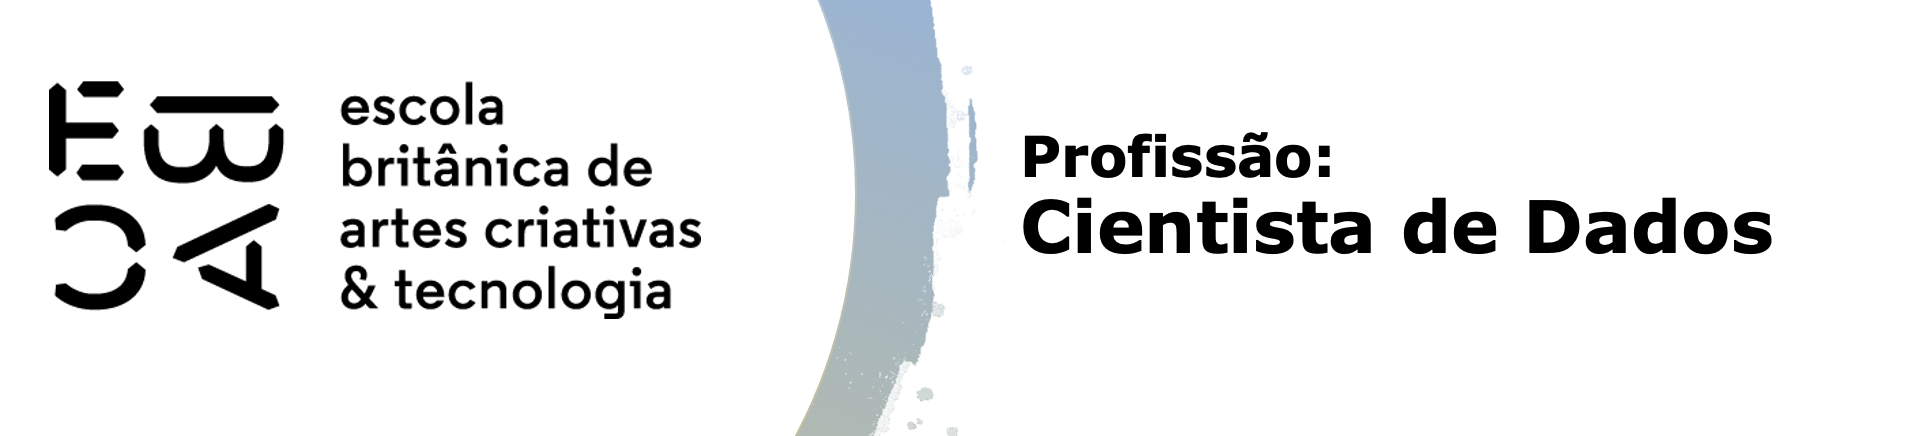

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
#Carregamento da base X_train.txt
X_train = pd.read_csv('X_train.txt', sep='\s+', header=None)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [3]:
#Carregamento da base X_train.txt
X_test = pd.read_csv('X_test.txt', sep='\s+', header=None)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [4]:
# Importando base y_train
y_train = pd.read_csv('y_train.txt', header=None)
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


In [5]:
# Importando base y_test
y_test = pd.read_csv('y_test.txt', header=None)
y_test.head()

,0
0,5
1,5
2,5
3,5
4,5


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [6]:
%%time
#Ajustar a árvore de decisão com min_samples_leaf=20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
clf.fit(X_train, y_train)

CPU times: total: 6.08 s
Wall time: 6.34 s


DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [7]:
# Obter as importâncias das variáveis
feature_importances = clf.feature_importances_

# Organizar as variáveis por importância
feature_importances_df = pd.DataFrame({
    'Feature': np.arange(len(feature_importances)),  # Índice das variáveis
    'Importance': feature_importances
})

# Ordenar pelas variáveis mais importantes
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Selecionar as 3 variáveis mais importantes
top_3_features = feature_importances_df.head(3)

print("As 3 variáveis mais importantes são:")
print(top_3_features)

As 3 variáveis mais importantes são:
     Feature  Importance
52        52    0.257544
389      389    0.216098
559      559    0.141766


In [8]:
top_3_features = [52, 310, 41]  

# Selecionar as colunas corretas para treino e teste
X_train_top3 = X_train.iloc[:, top_3_features]
X_test_top3 = X_test.iloc[:, top_3_features]

In [9]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_top3, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
#garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [11]:
ccp_alphas

array([0.00000000e+00, 9.06782735e-05, 1.02013058e-04, 1.08813928e-04,
       1.11286972e-04, 1.13347842e-04, 1.16586352e-04, 1.19015234e-04,
       1.21444116e-04, 1.22415669e-04, 1.22415669e-04, 1.22793495e-04,
       1.24682626e-04, 1.25554533e-04, 1.26301881e-04, 1.26949583e-04,
       1.27516322e-04, 1.28016386e-04, 1.28460887e-04, 1.28858599e-04,
       1.30350018e-04, 1.30350018e-04, 1.30576714e-04, 1.30785971e-04,
       1.31883319e-04, 1.32016898e-04, 1.32131199e-04, 1.32529784e-04,
       1.33123423e-04, 1.33297062e-04, 1.33451044e-04, 1.33750453e-04,
       1.34055621e-04, 1.34378646e-04, 1.34398155e-04, 1.34435812e-04,
       1.34571149e-04, 1.34757990e-04, 1.35092122e-04, 1.35167301e-04,
       1.35541825e-04, 1.35815604e-04, 1.36017410e-04, 1.39456039e-04,
       1.39903622e-04, 1.45085238e-04, 1.51947050e-04, 1.52339499e-04,
       1.53455540e-04, 1.54565239e-04, 1.55448469e-04, 1.60020483e-04,
       1.60406739e-04, 1.62266384e-04, 1.63220892e-04, 1.64383434e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [12]:
%%time
grid_parametros = {'ccp_alpha':ccp_alphas[::10]}

grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(X_train_top3, y_train)

Fitting 10 folds for each of 23 candidates, totalling 230 fits
[CV 1/10; 1/23] START ccp_alpha=0.0.............................................
[CV 1/10; 1/23] END ..............ccp_alpha=0.0;, score=0.724 total time=   0.0s
[CV 2/10; 1/23] START ccp_alpha=0.0.............................................
[CV 2/10; 1/23] END ..............ccp_alpha=0.0;, score=0.811 total time=   0.0s
[CV 3/10; 1/23] START ccp_alpha=0.0.............................................
[CV 3/10; 1/23] END ..............ccp_alpha=0.0;, score=0.796 total time=   0.0s
[CV 4/10; 1/23] START ccp_alpha=0.0.............................................
[CV 4/10; 1/23] END ..............ccp_alpha=0.0;, score=0.717 total time=   0.0s
[CV 5/10; 1/23] START ccp_alpha=0.0.............................................
[CV 5/10; 1/23] END ..............ccp_alpha=0.0;, score=0.795 total time=   0.0s
[CV 6/10; 1/23] START ccp_alpha=0.0.............................................
[CV 6/10; 1/23] END ..............ccp_alpha=0.

[CV 2/10; 6/23] END ccp_alpha=0.00015544846883258198;, score=0.811 total time=   0.0s
[CV 3/10; 6/23] START ccp_alpha=0.00015544846883258198..........................
[CV 3/10; 6/23] END ccp_alpha=0.00015544846883258198;, score=0.796 total time=   0.0s
[CV 4/10; 6/23] START ccp_alpha=0.00015544846883258198..........................
[CV 4/10; 6/23] END ccp_alpha=0.00015544846883258198;, score=0.718 total time=   0.0s
[CV 5/10; 6/23] START ccp_alpha=0.00015544846883258198..........................
[CV 5/10; 6/23] END ccp_alpha=0.00015544846883258198;, score=0.795 total time=   0.0s
[CV 6/10; 6/23] START ccp_alpha=0.00015544846883258198..........................
[CV 6/10; 6/23] END ccp_alpha=0.00015544846883258198;, score=0.751 total time=   0.0s
[CV 7/10; 6/23] START ccp_alpha=0.00015544846883258198..........................
[CV 7/10; 6/23] END ccp_alpha=0.00015544846883258198;, score=0.774 total time=   0.0s
[CV 8/10; 6/23] START ccp_alpha=0.00015544846883258198.........................

[CV 3/10; 11/23] END ccp_alpha=0.0002431506191322548;, score=0.796 total time=   0.0s
[CV 4/10; 11/23] START ccp_alpha=0.0002431506191322548..........................
[CV 4/10; 11/23] END ccp_alpha=0.0002431506191322548;, score=0.718 total time=   0.0s
[CV 5/10; 11/23] START ccp_alpha=0.0002431506191322548..........................
[CV 5/10; 11/23] END ccp_alpha=0.0002431506191322548;, score=0.795 total time=   0.0s
[CV 6/10; 11/23] START ccp_alpha=0.0002431506191322548..........................
[CV 6/10; 11/23] END ccp_alpha=0.0002431506191322548;, score=0.751 total time=   0.0s
[CV 7/10; 11/23] START ccp_alpha=0.0002431506191322548..........................
[CV 7/10; 11/23] END ccp_alpha=0.0002431506191322548;, score=0.774 total time=   0.0s
[CV 8/10; 11/23] START ccp_alpha=0.0002431506191322548..........................
[CV 8/10; 11/23] END ccp_alpha=0.0002431506191322548;, score=0.740 total time=   0.0s
[CV 9/10; 11/23] START ccp_alpha=0.0002431506191322548.........................

[CV 3/10; 16/23] END ccp_alpha=0.0003819137707543717;, score=0.803 total time=   0.0s
[CV 4/10; 16/23] START ccp_alpha=0.0003819137707543717..........................
[CV 4/10; 16/23] END ccp_alpha=0.0003819137707543717;, score=0.710 total time=   0.0s
[CV 5/10; 16/23] START ccp_alpha=0.0003819137707543717..........................
[CV 5/10; 16/23] END ccp_alpha=0.0003819137707543717;, score=0.796 total time=   0.0s
[CV 6/10; 16/23] START ccp_alpha=0.0003819137707543717..........................
[CV 6/10; 16/23] END ccp_alpha=0.0003819137707543717;, score=0.756 total time=   0.0s
[CV 7/10; 16/23] START ccp_alpha=0.0003819137707543717..........................
[CV 7/10; 16/23] END ccp_alpha=0.0003819137707543717;, score=0.774 total time=   0.0s
[CV 8/10; 16/23] START ccp_alpha=0.0003819137707543717..........................
[CV 8/10; 16/23] END ccp_alpha=0.0003819137707543717;, score=0.740 total time=   0.0s
[CV 9/10; 16/23] START ccp_alpha=0.0003819137707543717.........................

[CV 3/10; 21/23] END ccp_alpha=0.0013836937794704388;, score=0.807 total time=   0.0s
[CV 4/10; 21/23] START ccp_alpha=0.0013836937794704388..........................
[CV 4/10; 21/23] END ccp_alpha=0.0013836937794704388;, score=0.737 total time=   0.0s
[CV 5/10; 21/23] START ccp_alpha=0.0013836937794704388..........................
[CV 5/10; 21/23] END ccp_alpha=0.0013836937794704388;, score=0.800 total time=   0.0s
[CV 6/10; 21/23] START ccp_alpha=0.0013836937794704388..........................
[CV 6/10; 21/23] END ccp_alpha=0.0013836937794704388;, score=0.762 total time=   0.0s
[CV 7/10; 21/23] START ccp_alpha=0.0013836937794704388..........................
[CV 7/10; 21/23] END ccp_alpha=0.0013836937794704388;, score=0.769 total time=   0.0s
[CV 8/10; 21/23] START ccp_alpha=0.0013836937794704388..........................
[CV 8/10; 21/23] END ccp_alpha=0.0013836937794704388;, score=0.766 total time=   0.0s
[CV 9/10; 21/23] START ccp_alpha=0.0013836937794704388.........................

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.00012242, 0.00013035, 0.00013345, 0.00013554,
       0.00015545, 0.00017682, 0.00019603, 0.00021639, 0.00023358,
       0.00024315, 0.0002526 , 0.00027013, 0.00031964, 0.00035114,
       0.00038191, 0.00045071, 0.00051156, 0.00065288, 0.00078997,
       0.00138369, 0.00214412, 0.00466677])},
             verbose=100)

In [13]:
grid


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.00012242, 0.00013035, 0.00013345, 0.00013554,
       0.00015545, 0.00017682, 0.00019603, 0.00021639, 0.00023358,
       0.00024315, 0.0002526 , 0.00027013, 0.00031964, 0.00035114,
       0.00038191, 0.00045071, 0.00051156, 0.00065288, 0.00078997,
       0.00138369, 0.00214412, 0.00466677])},
             verbose=100)

In [14]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028016,0.001022,0.002398,0.000932,0.0,{'ccp_alpha': 0.0},0.724185,0.811141,0.795918,0.717007,0.794558,0.75102,0.77415,0.746939,0.846259,0.770068,0.773124,0.038081,15
1,0.027209,0.007032,0.001850,0.001633,0.000122,{'ccp_alpha': 0.00012241566920565835},0.724185,0.811141,0.795918,0.718367,0.794558,0.75102,0.77415,0.746939,0.846259,0.770068,0.773260,0.037882,6
2,0.029127,0.007046,0.001474,0.001015,0.00013,{'ccp_alpha': 0.00013035001813565465},0.724185,0.811141,0.795918,0.718367,0.794558,0.75102,0.77415,0.746939,0.846259,0.770068,0.773260,0.037882,6
3,0.027945,0.005023,0.001848,0.001305,0.000133,{'ccp_alpha': 0.0001334510439977825},0.724185,0.811141,0.795918,0.718367,0.794558,0.75102,0.77415,0.746939,0.846259,0.770068,0.773260,0.037882,6
4,0.026708,0.001254,0.002258,0.000508,0.000136,{'ccp_alpha': 0.0001355418248780601},0.724185,0.811141,0.795918,0.718367,0.794558,0.75102,0.77415,0.746939,0.846259,0.770068,0.773260,0.037882,6


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [15]:
grid.best_score_

0.8018108547766932

In [16]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=42, ccp_alpha=melhor_ccp).fit(X_train_top3, y_train)

In [17]:
clf.score(X_train_top3, y_train)

0.845076169749728

In [18]:
clf.score(X_test_top3, y_test)

0.7438072616219885

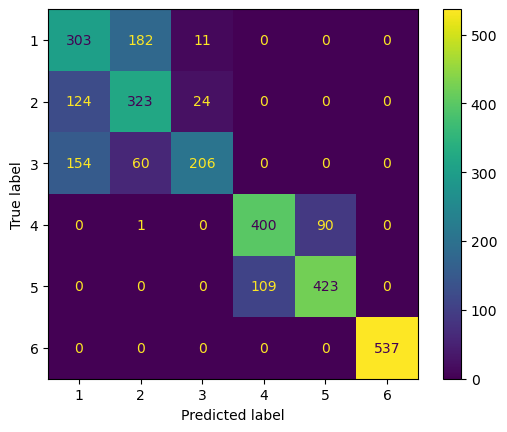

In [19]:
# Computar a matriz d0.7438072616219885e confusão
cm = confusion_matrix(y_test, clf.predict(X_test_top3))

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [22]:
# Criar a variável binária para a classe 2
y_train_bin = (y_train == 2).astype(int)
y_test_bin = (y_test == 2).astype(int)


In [23]:
# Treinar a árvore simples
clf_bin = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=42)
clf_bin.fit(X_train, y_train_bin)

# Exibir a acurácia no conjunto de treino
acuracia_bin = clf_bin.score(X_train, y_train_bin)
print("Acurácia da árvore binária no conjunto de treino:", acuracia_bin)

Acurácia da árvore binária no conjunto de treino: 0.9806855277475517


In [24]:
# Obter importâncias das variáveis
importancias = clf_bin.feature_importances_

# Criar um DataFrame com as importâncias
importancias_df = pd.DataFrame({
    'Variável': range(X_train.shape[1]),
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# Selecionar as 3 variáveis mais importantes
top_3_binarias = importancias_df.head(3)['Variável'].values
print("As 3 variáveis mais importantes são:", top_3_binarias)

As 3 variáveis mais importantes são: [ 73 330 426]


In [25]:
# Combinar as variáveis originais com as novas selecionadas
variaveis_final = list(top_3_features) + list(top_3_binarias)

# Selecionar as colunas correspondentes nos conjuntos de treino e teste
X_train_final = X_train.iloc[:, variaveis_final]
X_test_final = X_test.iloc[:, variaveis_final]

In [26]:
# Treinar a árvore com as novas variáveis
clf_final = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=42)
clf_final.fit(X_train_final, y_train)

# Avaliar a acurácia no conjunto de teste
acuracia_final = clf_final.score(X_test_final, y_test)
print("Acurácia do modelo final no conjunto de teste:", acuracia_final)

Acurácia do modelo final no conjunto de teste: 0.8204954190702409


## Conclusão: 

Houve uma melhora significativa na acuracia de 0.7438072616219885 para 0.8204954190702409